<h1><center>Analysis and Recomendation system for Netflix Data</center></h1>

# Importing Libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [2]:
netflix_df = pd.read_csv('netflix_content_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
#Checking null values
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
#Finding the county with more titles so we can repleace this county name with the nulls in Country coloumn.
netflix_df['country'].value_counts().to_frame().head()

,country
United States,2032
India,777
United Kingdom,348
Japan,176
Canada,141


In [6]:
#Finding the date with more titles so we can repleace this date with the nulls in date coloumn
netflix_df['date_added'].value_counts().to_frame().head()

,date_added
"January 1, 2020",122
"November 1, 2019",94
"March 1, 2018",78
"December 31, 2019",74
"October 1, 2018",72


In [7]:
#Finding the rating category with more titles so we can repleace this rating category with the nulls in rating coloumn
netflix_df['rating'].value_counts().to_frame().head()

,rating
TV-MA,2027
TV-14,1698
TV-PG,701
R,508
PG-13,286


In [8]:
#Replacing the missing values
#Replacing Director and Cast cell with 'Unknown'
netflix_df['director'].replace(np.nan,"Unknown",inplace=True)
netflix_df['cast'].replace(np.nan,"Unknown",inplace=True)
netflix_df['country'].replace(np.nan,"United States",inplace=True)
netflix_df['date_added'].replace(np.nan,"January 1,2020",inplace=True)
netflix_df["rating"].replace(np.nan,"TV-MA",inplace=True)
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
#data does not contain Realease month of a title plays which plays major role
#creating a seperate coloumns for release month
netflix_date = netflix_df['date_added'].apply(lambda x: x.lstrip().split(" ")[0]).to_frame()
netflix_date.rename(columns = {'date_added' : 'release_month'}, inplace = True)

In [10]:
netflix_df_new = pd.concat([netflix_df,netflix_date],axis=1)
netflix_df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_month
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,September
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",September
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,September
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,September


In [11]:
#Counting the seasons and create a new column
netflix_df_new['season_count'] = netflix_df_new.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
netflix_df_new['season_count'] = pd.to_numeric(netflix_df_new['season_count'],errors='coerce')
netflix_df_new = netflix_df_new.replace(np.nan, 0, regex=True)
netflix_df_new['season_count'] = pd.to_numeric(netflix_df_new['season_count'], downcast ='signed')
netflix_df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_month,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September,0
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,September,0
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",September,1
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,September,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,September,0


In [12]:
#Replacing duration column with just the number of minutes
netflix_df_new['duration'] = netflix_df_new.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
netflix_df_new['duration'] = pd.to_numeric(netflix_df_new['duration'],errors='coerce')
netflix_df_new = netflix_df_new.replace(np.nan, 0, regex=True)
netflix_df_new['duration'] = pd.to_numeric(netflix_df_new['duration'], downcast ='signed')
netflix_df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_month,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September,0
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,September,0
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,0,Kids' TV,"With the help of three human allies, the Autob...",September,1
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,0,Kids' TV,When a prison ship crash unleashes hundreds of...,September,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,September,0


# Data Visualization

Movie      4265
TV Show    1969
Name: type, dtype: int64


Text(0.5, 1.0, 'Movies or TV Shows')

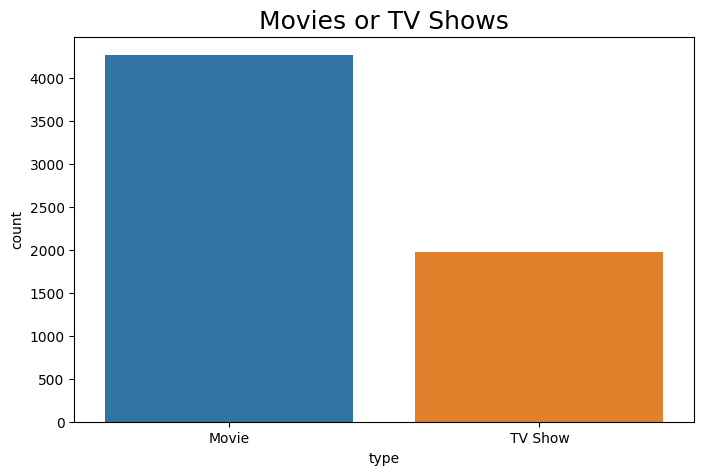

In [13]:
#Did netflix contain more movies or TV shows
print(netflix_df['type'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=netflix_df, order=netflix_df.type.value_counts().index[0:2])
plt.title('Movies or TV Shows', size=18)

In [14]:
# Which year netflix released more content
fig = px.pie(netflix_df_new, values = netflix_df_new['release_year'].value_counts()[:10], names = netflix_df_new['release_year'].value_counts()[:10].index,labels= netflix_df_new['release_year'].value_counts()[:10].index)
fig.update_layout(title=" Content based on Year of Release")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


Text(0.5, 1.0, 'Content released per year')

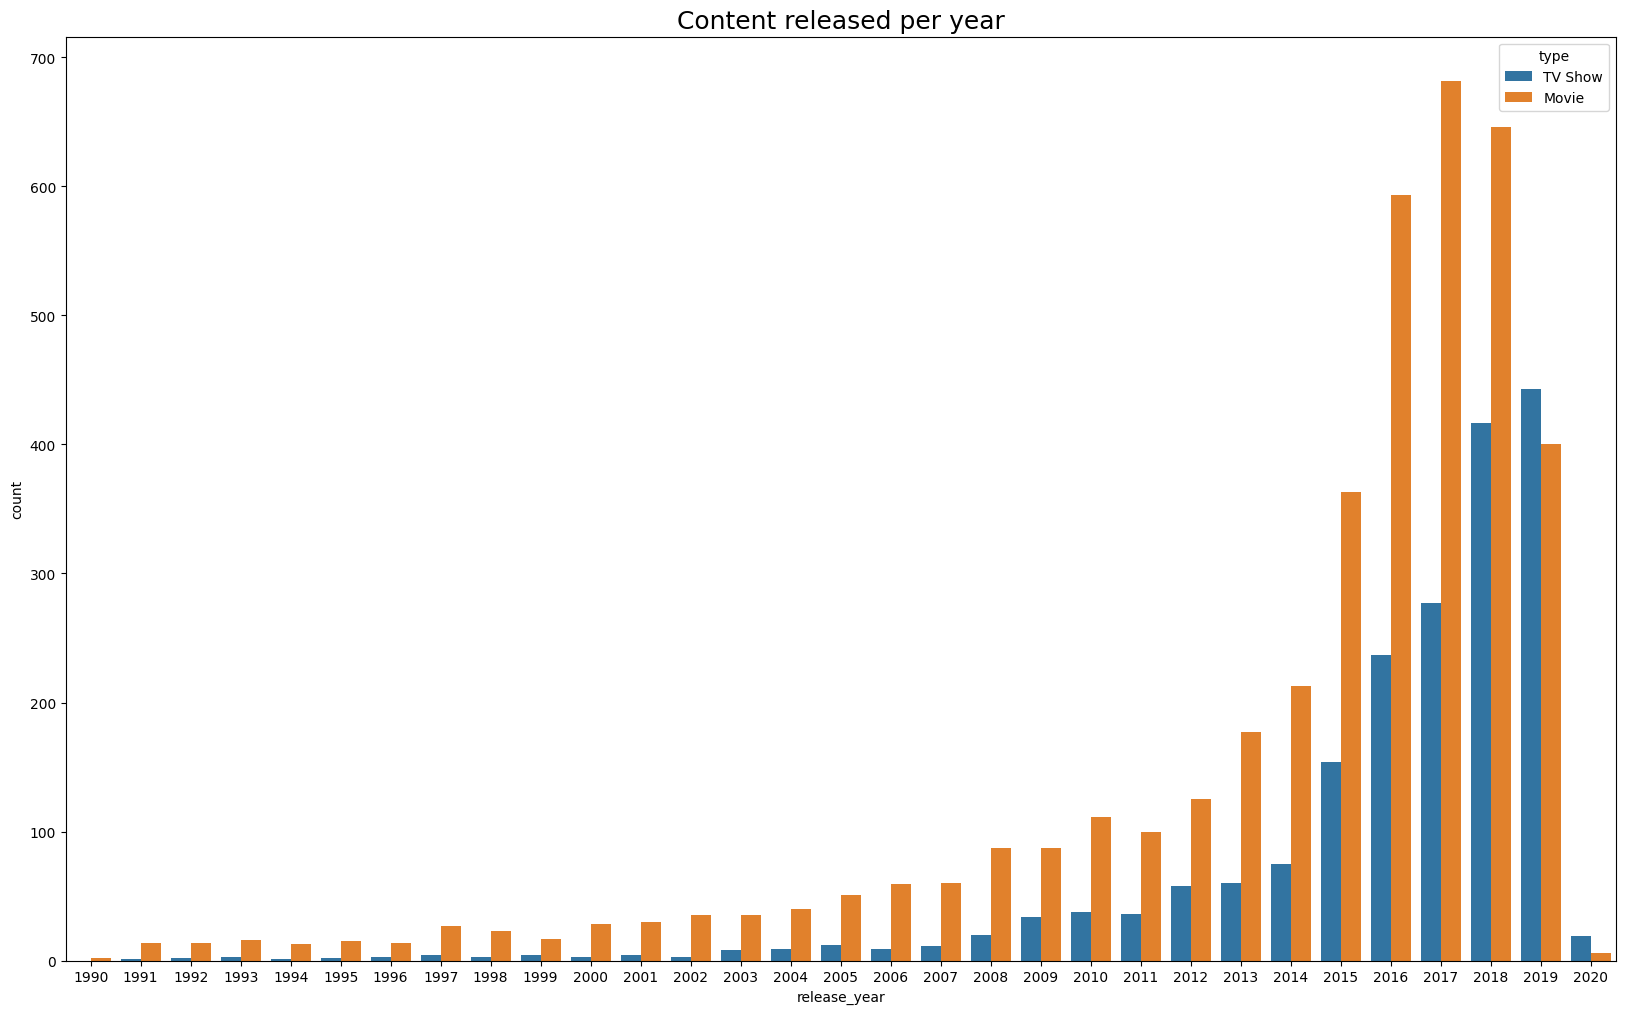

In [15]:
# plot to see type of content of netflix vs released year
plt.figure(figsize=(20,12))
sns.countplot(x='release_year',hue='type', data=netflix_df.sort_values(by='release_year')[-1:200:-1]);
plt.title('Content released per year', size=18)

In [16]:
# Finding which country has more releases on netflix
from collections import Counter
def return_counter(data_frame, column_name, limit):
  print('Top ', limit, ' country/countries with most content:', dict(Counter(data_frame[column_name].values).most_common(limit)))
return_counter(netflix_df, 'country', 1)

Top  1  country/countries with most content: {'United States': 2508}


Text(0.5, 1.0, 'Top 10 Countries with most content released')

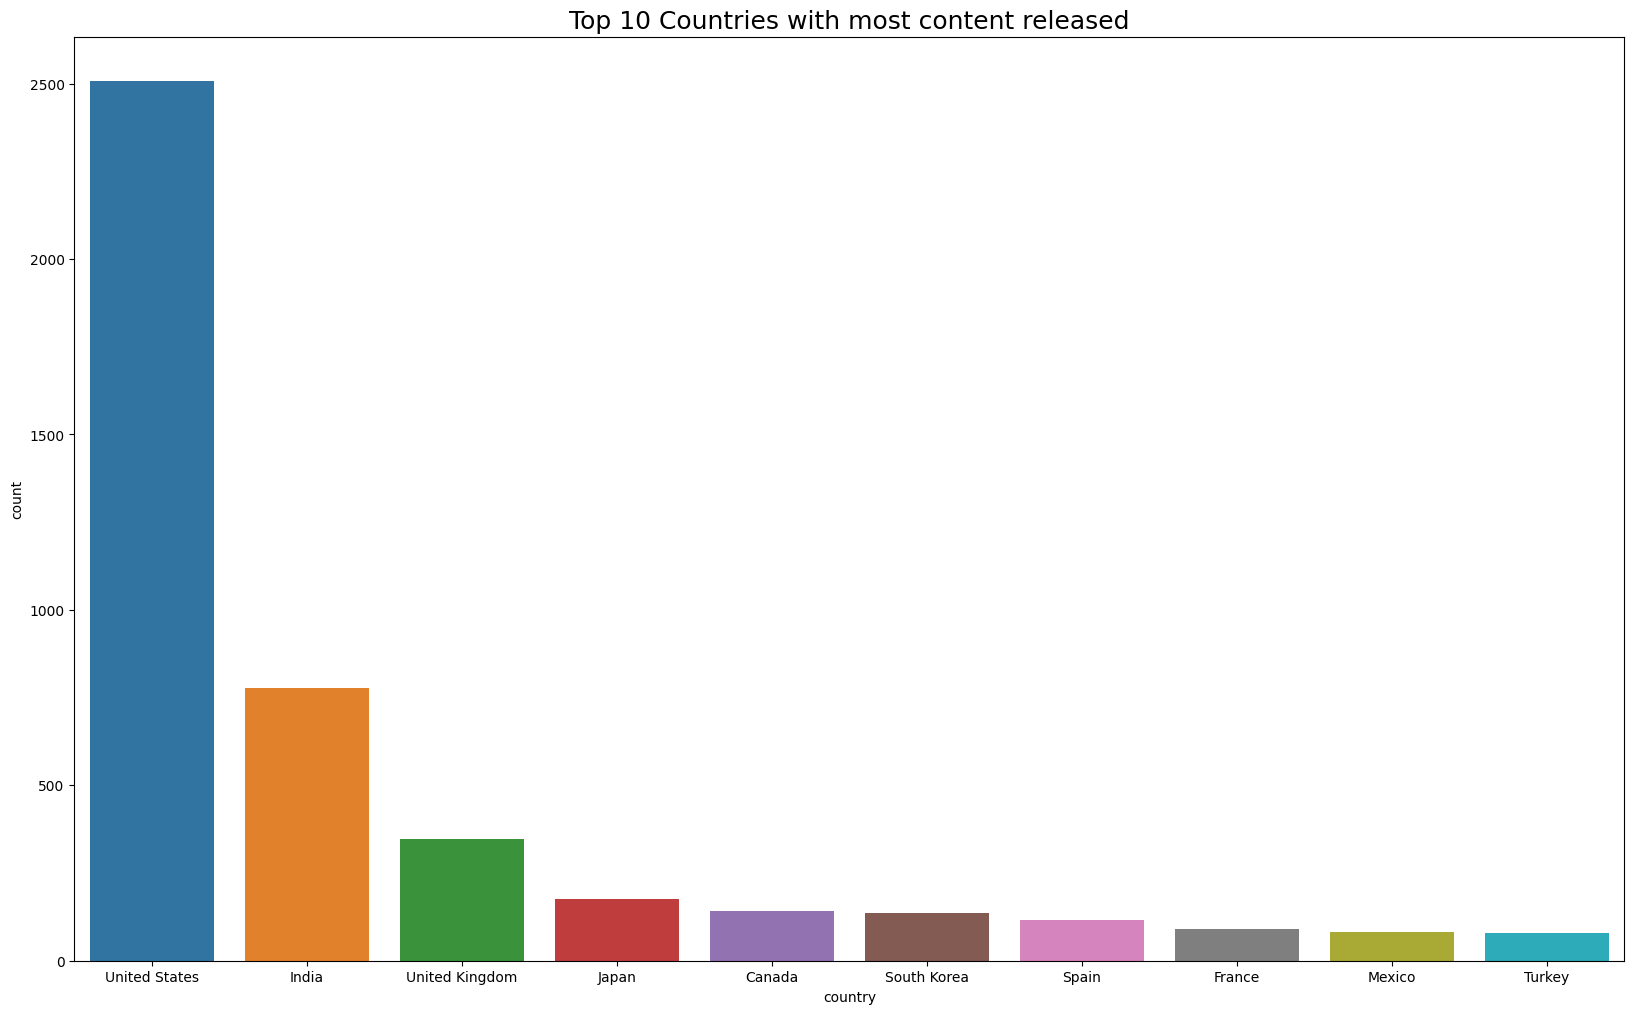

In [17]:
#Content released by country
plt.figure(figsize=(20,12))
sns.countplot(x='country', data=netflix_df, order=netflix_df.country.value_counts().index[0:10])
plt.title('Top 10 Countries with most content released', size=18)

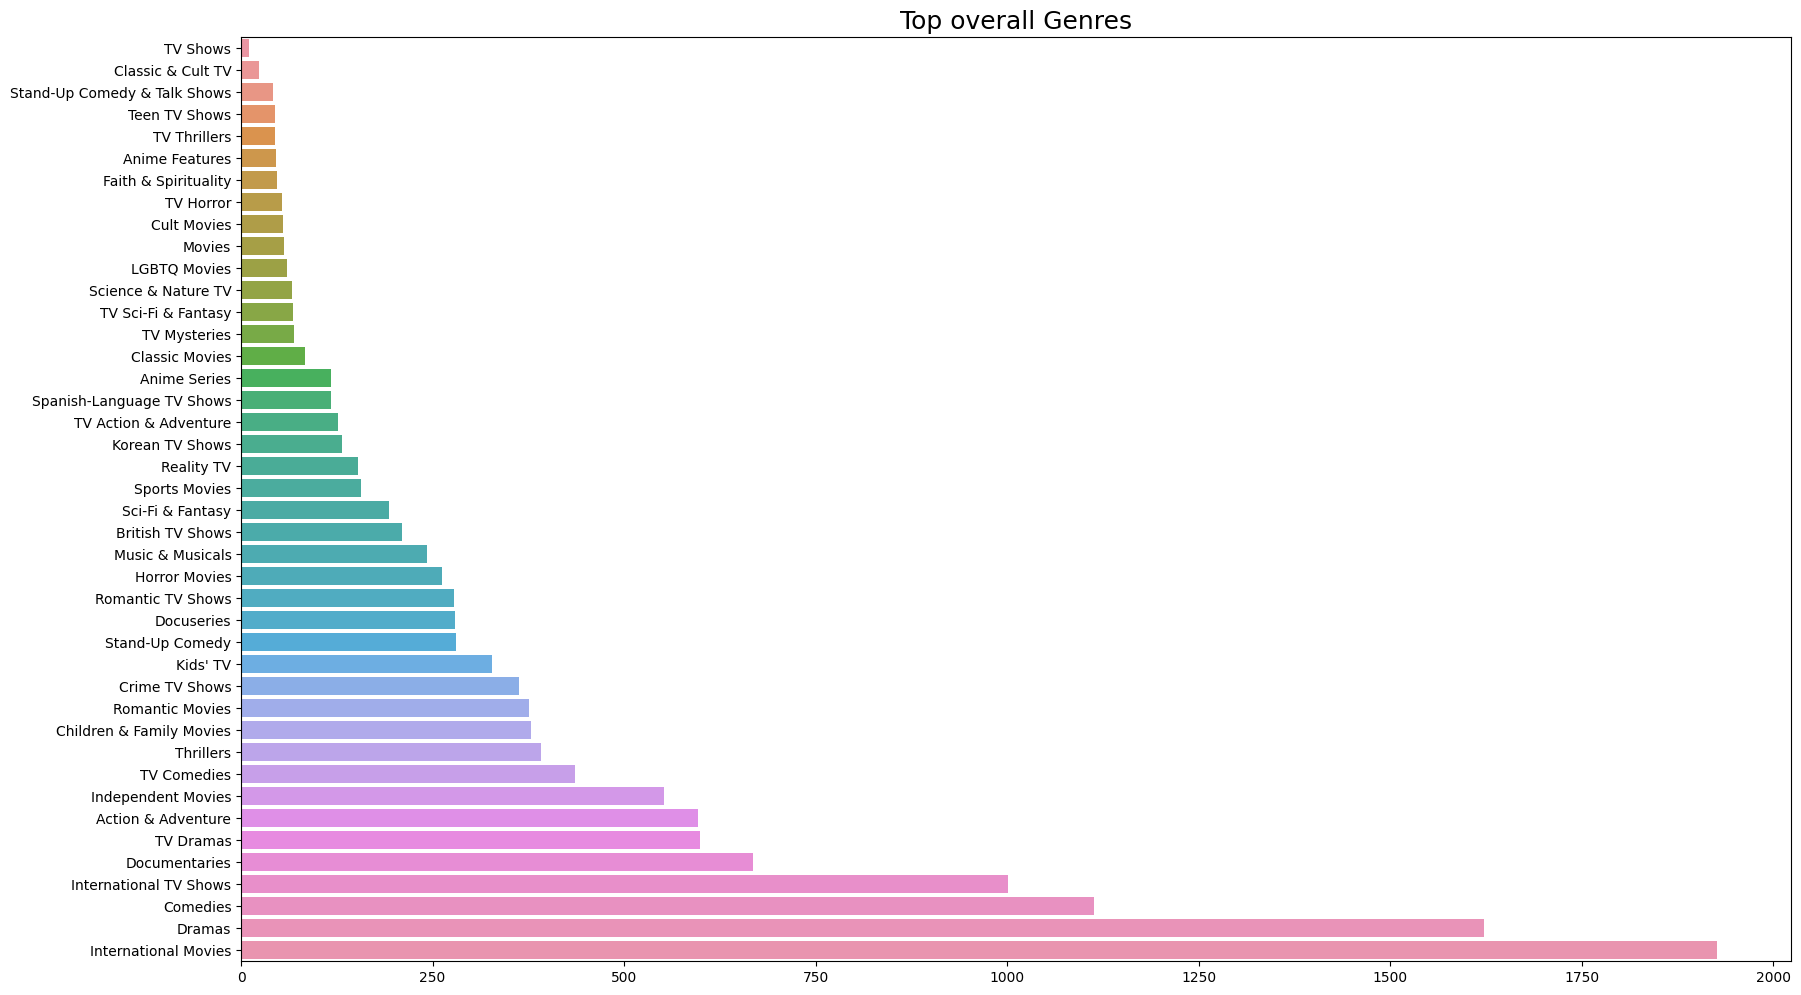

In [18]:
#Creating chart to summarizing the types of content
categories = ", ".join(netflix_df_new['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
plt.figure(figsize=(20,12))
sns.barplot(y=labels, x=values)
plt.title('Top overall Genres', size=18);

Text(0.5, 1.0, 'Top 10 Categories of Movies ')

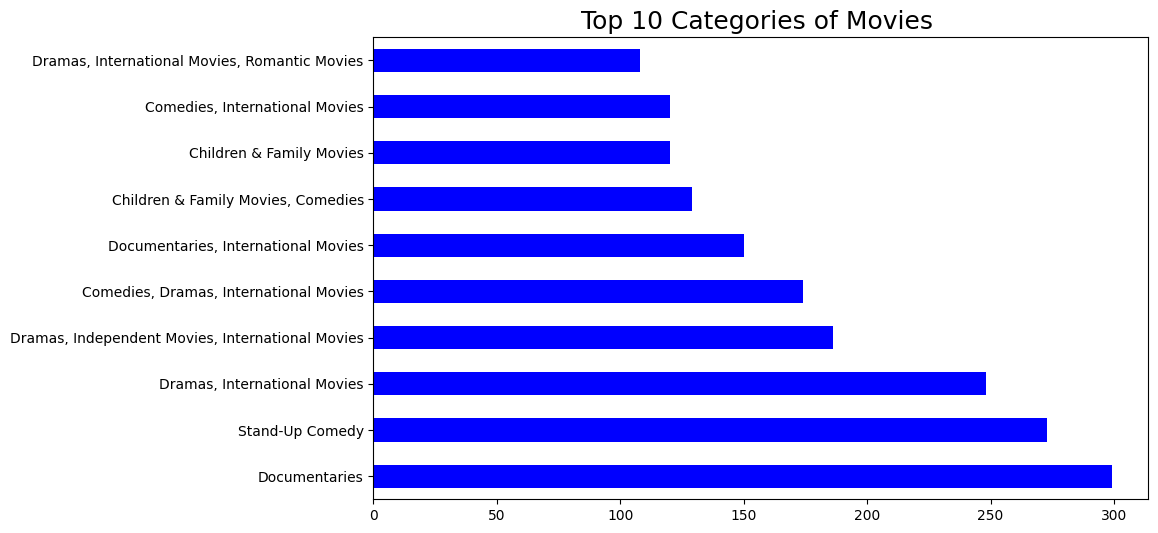

In [19]:
#Top 10 Categories of all movies released on netflix
plt.figure(figsize=(10,6))
netflix_df_new[netflix_df_new["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="blue")
plt.title("Top 10 Categories of Movies ",size=18)

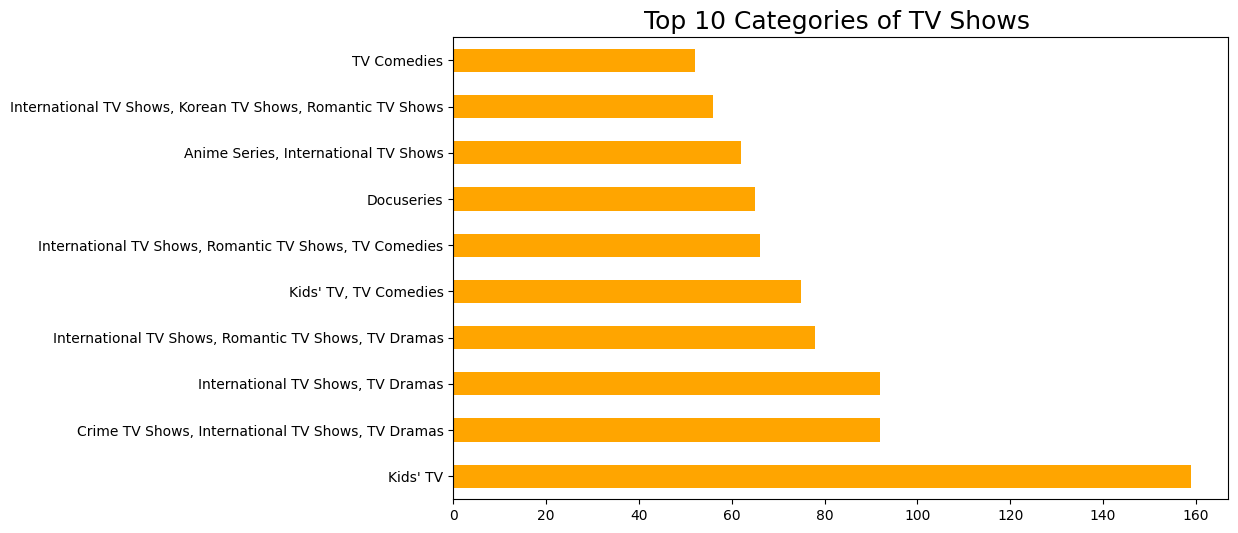

In [21]:
#Top 10 Categories of all TV Shows released on netflix
plt.figure(figsize=(10,6))
netflix_df_new[netflix_df_new["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="orange")
plt.title("Top 10 Categories of TV Shows ",size=18);

In [22]:
# calculating what content does each country provide.
cat_country = netflix_df_new.groupby(netflix_df_new["listed_in"])["country"].value_counts()
# top 20 most genres per counrty based on no.of releases.
cat_country.sort_values(ascending=False).head(20).to_frame()

,,country
listed_in,country,
Documentaries,United States,213
Stand-Up Comedy,United States,205
"Dramas, International Movies",India,102
"Dramas, Independent Movies, International Movies",India,87
Kids' TV,United States,86
"Comedies, Dramas, International Movies",India,85
Children & Family Movies,United States,84
"Children & Family Movies, Comedies",United States,70
Dramas,United States,62


In [23]:
#charts showing the actors with the most films or TV Shows in each country
#creating a trace for plotting movies and tv shows
def country_trace(country, flag = "movie"):
  netflix_df_new["from_us"] = netflix_df_new['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
  small = netflix_df_new[netflix_df_new["from_us"] == 1]
  if flag == "movie":
      small = small[small["duration"] != ""]
  else:
      small = small[small["season_count"] != ""]
  cast = ", ".join(small['cast'].fillna("")).split(", ")
  if cast[0] == '':
    return -1
  tags = Counter(cast).most_common(25)
  tags = [_ for _ in tags if "" != _[0]]
  labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
  trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
  return trace

In [26]:
# getting a country list for ease of use
from country_list import countries_for_language
countries = dict(countries_for_language('en'))
traces = []
titles = []
newline = 0

In [27]:
#Creating traces for countries and creating titles for the graphs to Movies
for title in countries:
  if country_trace(countries[title], flag="movie") != -1:
    traces.append(country_trace(countries[title], flag="movie"))
    titles.append(countries[title])
    newline+=1
    if(newline !=2):
      titles.append("")
    else:
      newline=0
titles.pop()

''

In [28]:
#charts showing the actors with the most films in each country
# geting 20 countries to plot data for Movies
from plotly.subplots import make_subplots
countries_num = 20
fig = make_subplots(rows=countries_num//2, cols=3, subplot_titles=titles)
j = 1
# creating the plot
for i in range(0,countries_num,2):
  fig.add_trace(traces[i], j, 1)
  fig.add_trace(traces[i+1], j, 3)
  j += 1
fig.update_layout(height=2600, showlegend=False)
fig.show()

In [29]:
#charts showing the actors with the most TV Shows in each country
traces = []
titles = []
countries_num = 20 #geting 30 countries
newline = 0
# creating traces for NON empty countries and creating titles for the graphs
for title in countries:
  if country_trace(countries[title], flag="tv_shows") != -1:
    traces.append(country_trace(countries[title], flag="tv_shows"))
    titles.append(countries[title])
    newline+=1
    if(newline !=2):
      titles.append("")
    else:
      newline=0
titles.pop()
fig = make_subplots(rows=countries_num//2, cols=3, subplot_titles=titles)
j = 1
# creating the plot
for i in range(0,countries_num,2):
  fig.add_trace(traces[i], j, 1)
  fig.add_trace(traces[i+1], j, 3)
  j += 1
fig.update_layout(height=2600, showlegend=False)
fig.show()

Text(0.5, 1.0, 'Ratings for Movies and TV Shows')

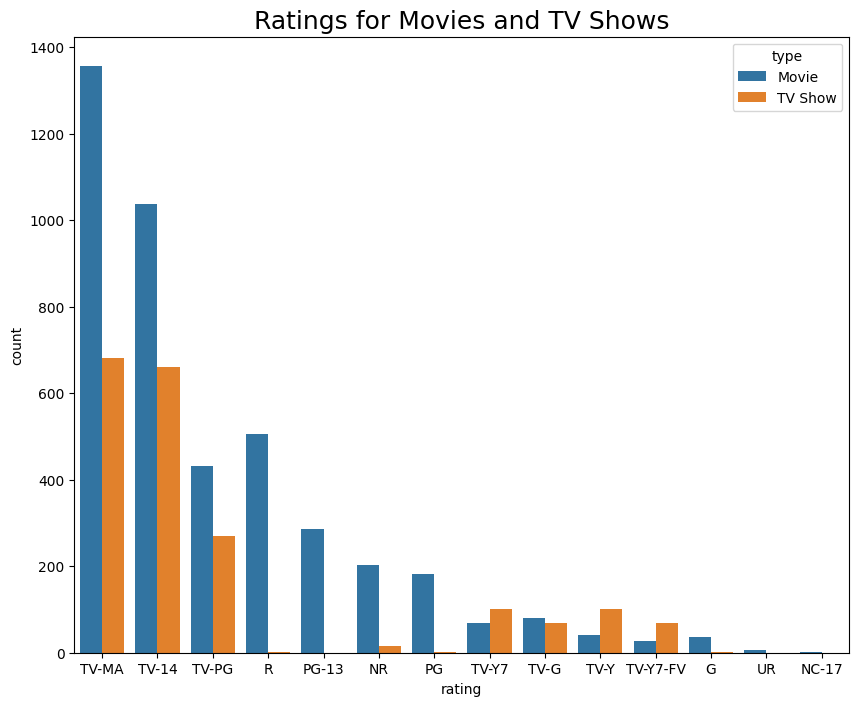

In [30]:
#plot every rating for movies and tv shows
plt.figure(figsize = (10,8))
sns.countplot(x="rating",data= netflix_df_new, hue= "type", order = netflix_df_new['rating'].value_counts().index[0:15])
plt.title('Ratings for Movies and TV Shows', size=18)

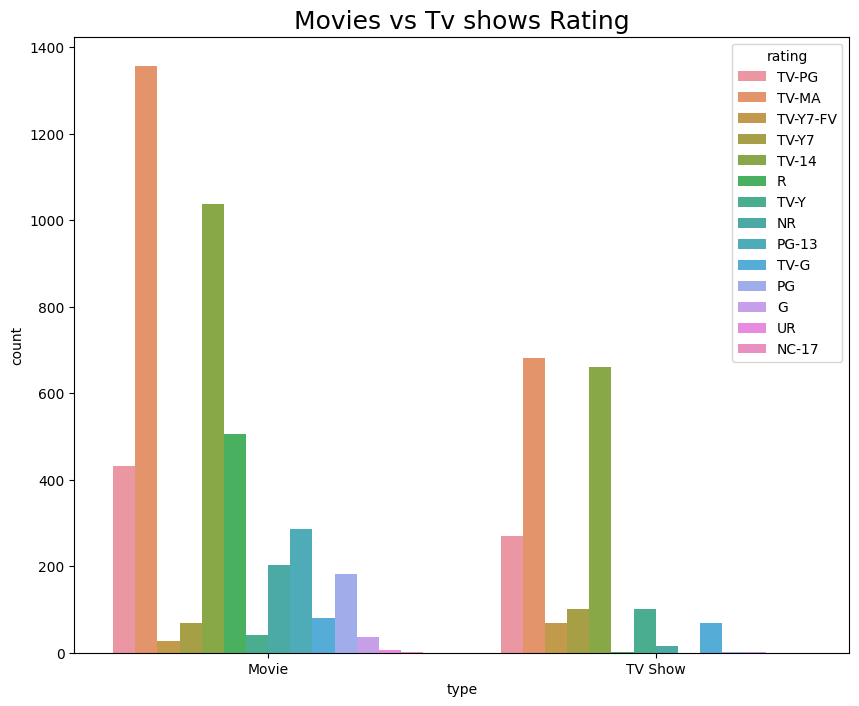

In [31]:
# differentating the ratings for Movies and TV Shows
plt.figure(figsize=(10,8))
sns.countplot(x='type',hue='rating',data=netflix_df_new)
plt.title("Movies vs Tv shows Rating", size=18);

In [32]:
# Creating a dictionary for movie/TV Series ratings.
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Mature',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Mature',
    'TV-Y': 'Little Kids',
    'NR': 'Mature',
    'PG-13': 'Teens',
    'TV-G': 'Little Kids',
    'PG': 'Older Kids',
    'G': 'Little Kids',
    'UR': 'Mature',
    'NC-17': 'Mature'
}

<Axes: xlabel='type'>

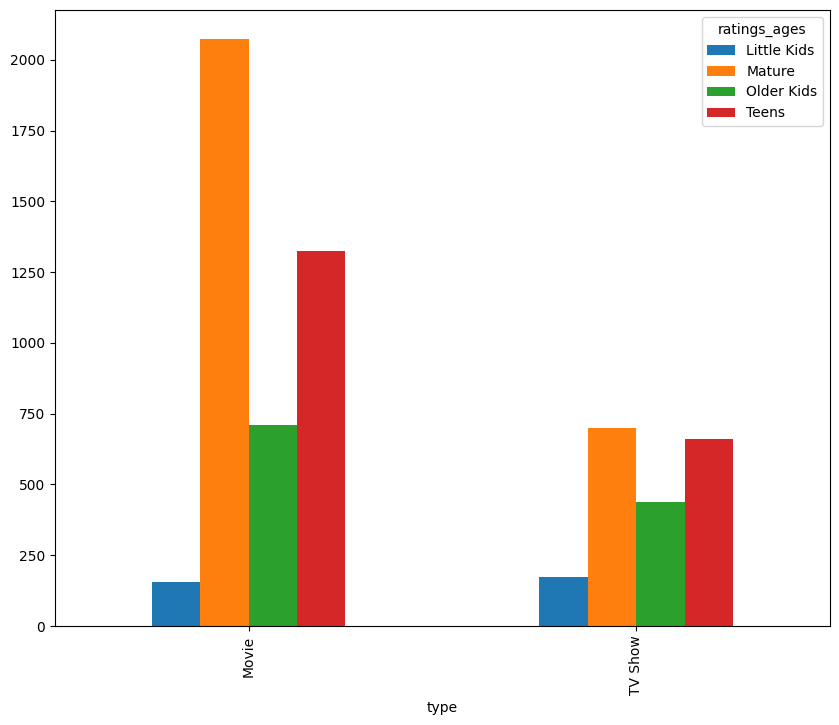

In [33]:
# Adding new column "rating_ages" based on the above dictionary
netflix_df_new["ratings_ages"] = netflix_df_new["rating"].replace(ratings_ages)
pd.crosstab(netflix_df_new["type"],netflix_df_new["ratings_ages"]).plot(kind="bar", figsize=(10,8))

Text(0.5, 1.0, 'Released content per month')

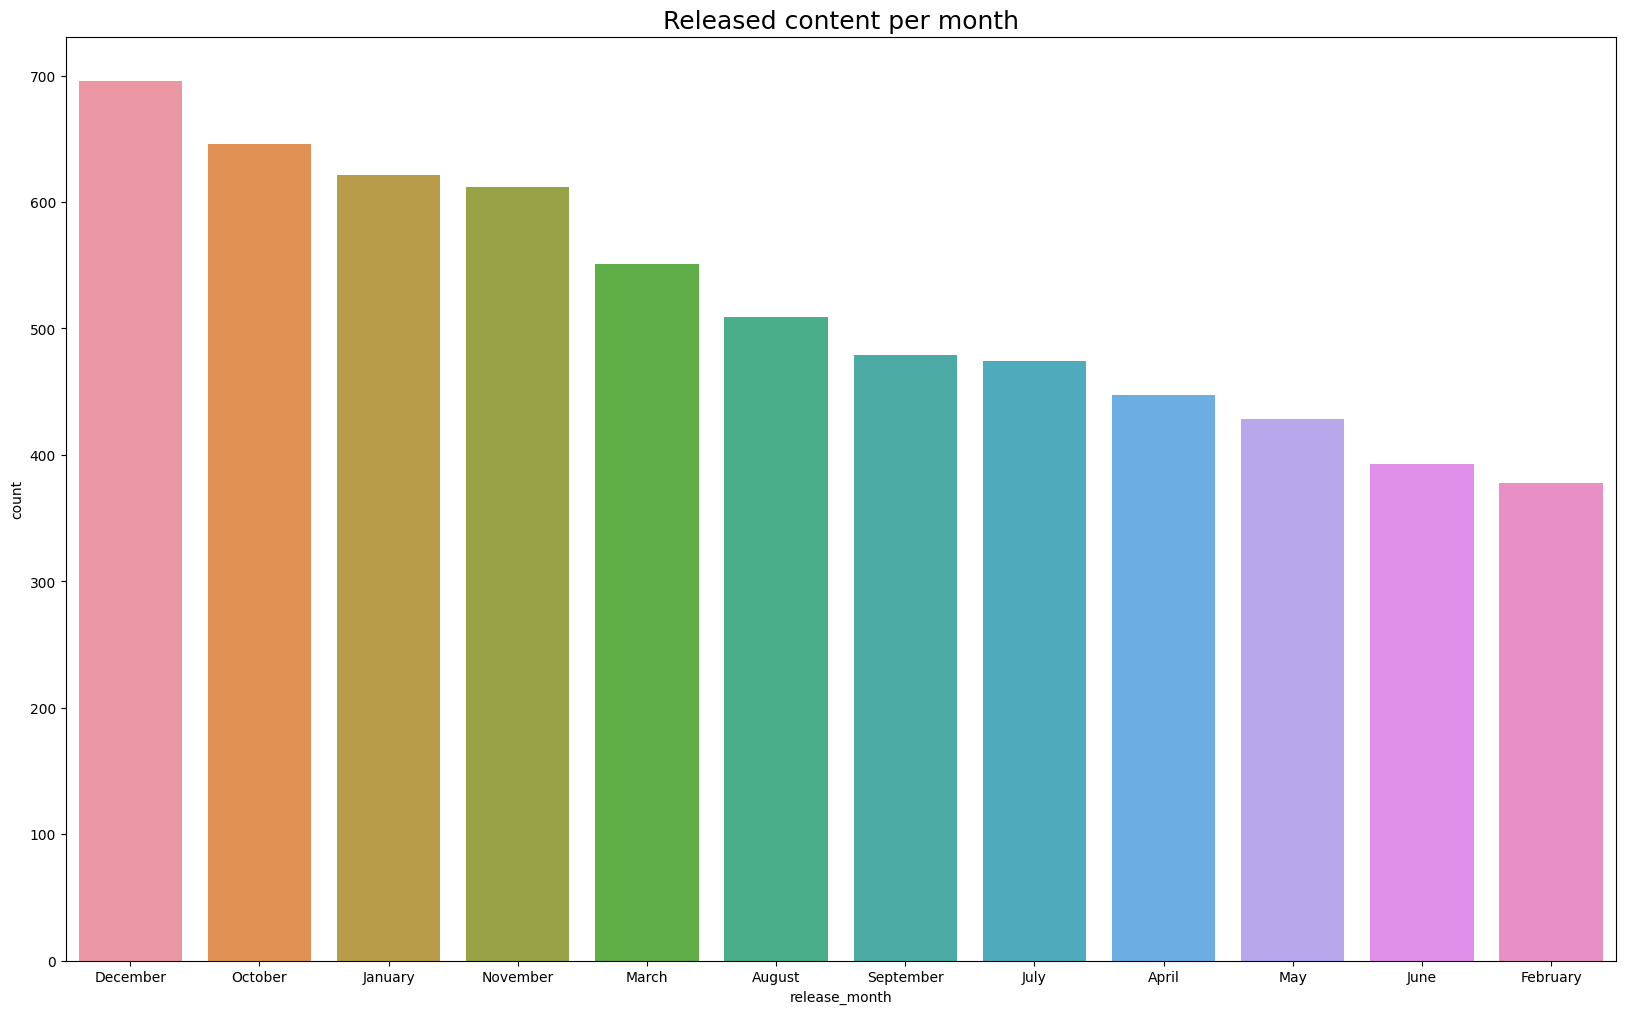

In [35]:
#Creating chart for content added per month
plt.figure(figsize=(20,12))
sns.countplot(x='release_month', data=netflix_df_new, order=netflix_df_new['release_month'].value_counts().index[0:12])
plt.title('Released content per month', size=18)

In [36]:
#directors by country and present related graphs
# showing the top directors of a country
def directors_most_content(country):
  small = netflix_df_new[netflix_df_new["country"] == country]
  col = "director"
  categories = ", ".join(small[col].fillna("")).split(", ")
  counter_list = Counter(categories).most_common(12)
  counter_list = [_ for _ in counter_list if _[0] != ""]
  # if there are none then just return
  if(len(counter_list) == 0):
    return -1
  labels = [_[0] for _ in counter_list][::-1]
  values = [_[1] for _ in counter_list][::-1]
  trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="orange"))
  data = [trace1]
  layout = go.Layout(title="Movie Directors from " + country + " with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
  fig = go.Figure(data, layout=layout)
  fig.show()
  return 0
#iterating through the countries
counter = 0
for index in countries:
  #checking the directors of this country, if the function returned -1 just go to the next country
  if directors_most_content(countries[index]) == -1:
    continue
  counter+=1
  if counter == 10: # Change this number if you want to see more/less countries
    break

In [39]:
# Create a new dataframe for TV Shows and their seasons
season_df = netflix_df_new[netflix_df_new["type"]=="TV Show"]
season_df = season_df[['type', 'title', 'season_count']]
sorted = season_df.sort_values(by='season_count', ascending=False).reset_index(drop=True)

Text(0.5, 1.0, 'Top 20 TV Shows sorted by the number of seasons')

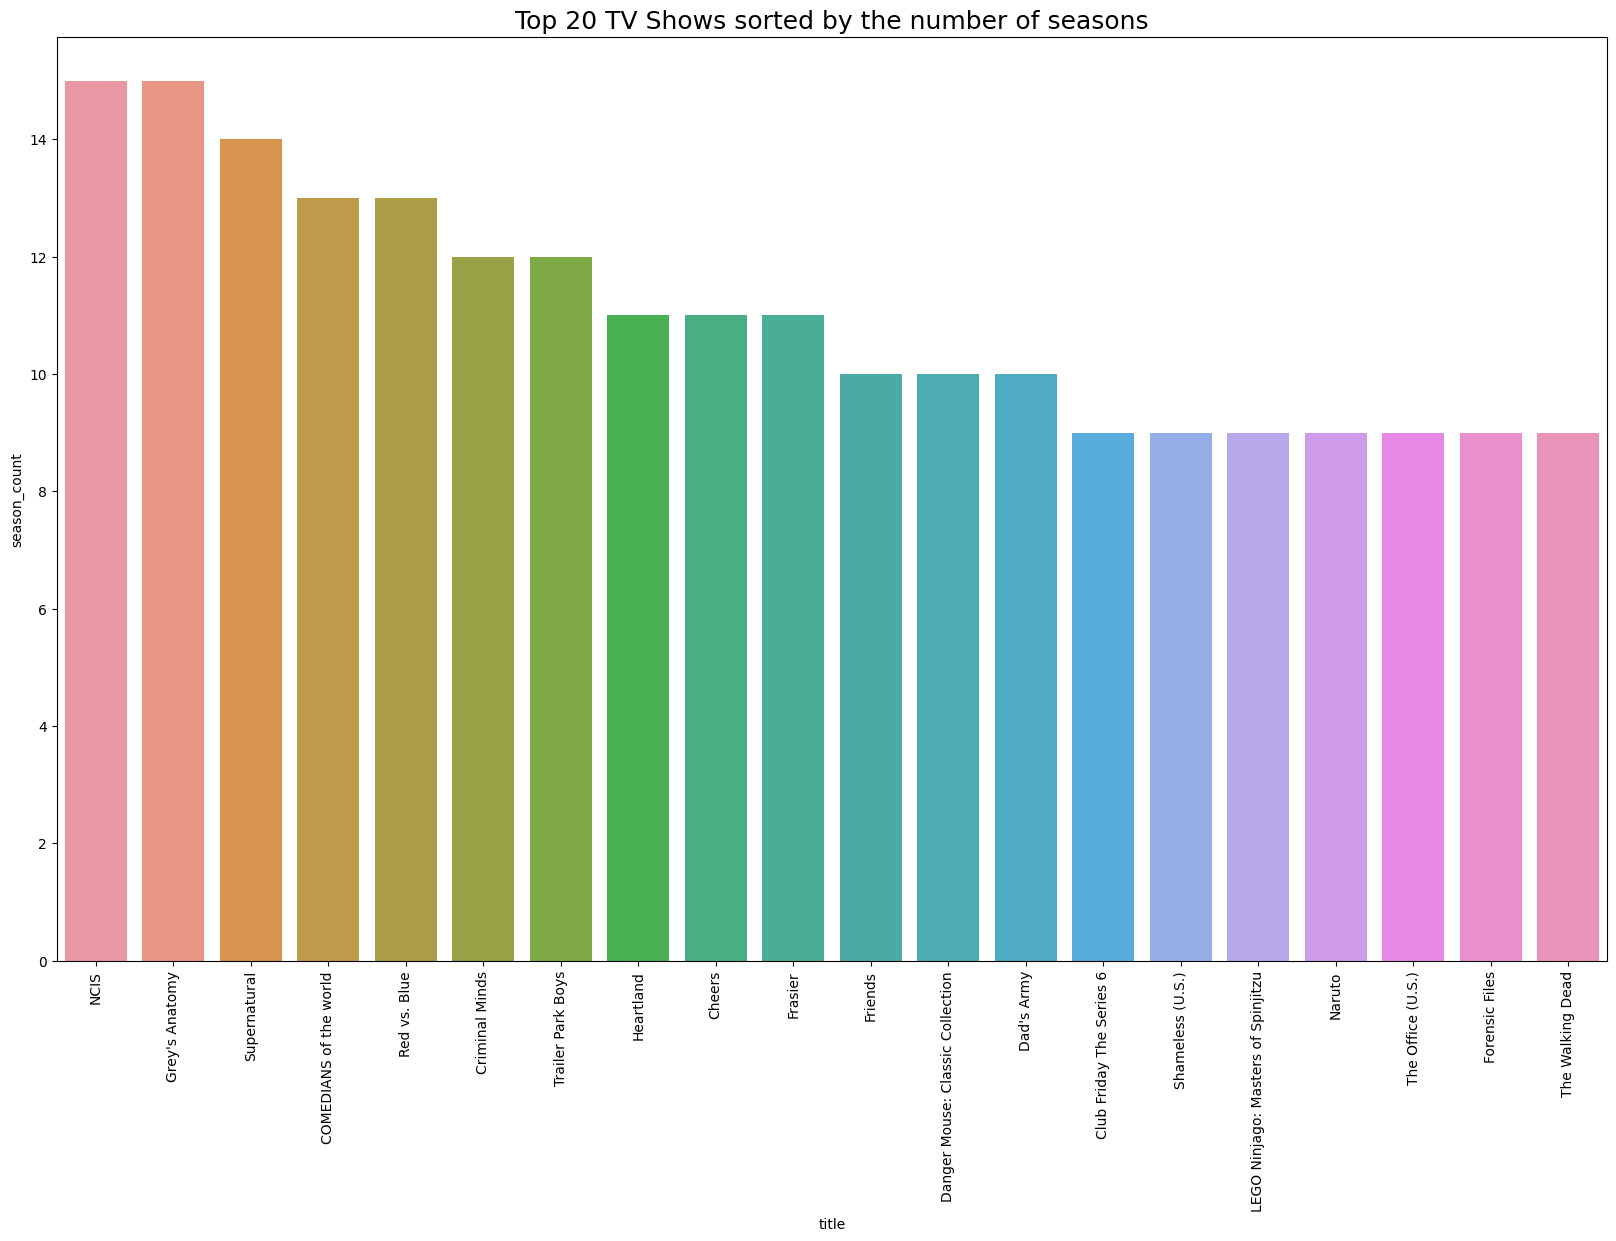

In [41]:
#Creating graph showing them by number of seasons
plt.figure(figsize = (20,12))
top = 20
sns.barplot(x="title", y="season_count", data=sorted[0:top])
plt.xticks(rotation=90)
plt.title('Top 20 TV Shows sorted by the number of seasons', size=18)

# Content Recommendation System

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
import numpy as np
import heapq
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import jaccard_score

In [43]:
recommendation_df = netflix_df_new[['show_id', 'title', 'description']]
# Concat titles and descriptions.
recommendation_df['text'] = recommendation_df['title'] + ' ' + recommendation_df['description']
recommendation_df

<ipython-input-43-ede3f6a4db89>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,title,description,text
0,81145628,Norm of the North: King Sized Adventure,Before planning an awesome wedding for his gra...,Norm of the North: King Sized Adventure Before...
1,80117401,Jandino: Whatever it Takes,Jandino Asporaat riffs on the challenges of ra...,Jandino: Whatever it Takes Jandino Asporaat ri...
2,70234439,Transformers Prime,"With the help of three human allies, the Autob...",Transformers Prime With the help of three huma...
3,80058654,Transformers: Robots in Disguise,When a prison ship crash unleashes hundreds of...,Transformers: Robots in Disguise When a prison...
4,80125979,#realityhigh,When nerdy high schooler Dani finally attracts...,#realityhigh When nerdy high schooler Dani fin...
...,...,...,...,...
6229,80000063,Red vs. Blue,"This parody of first-person shooter games, mil...",Red vs. Blue This parody of first-person shoot...
6230,70286564,Maron,"Marc Maron stars as Marc Maron, who interviews...","Maron Marc Maron stars as Marc Maron, who inte..."
6231,80116008,Little Baby Bum: Nursery Rhyme Friends,Nursery rhymes and original music for children...,Little Baby Bum: Nursery Rhyme Friends Nursery...
6232,70281022,A Young Doctor's Notebook and Other Stories,"Set during the Russian Revolution, this comic ...",A Young Doctor's Notebook and Other Stories Se...


# Bags Of Words (BoW) Model

In [44]:
CountVec = CountVectorizer(
                          ngram_range=(1,2), # (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams
                          stop_words='english',
                          max_df=0.4,
                          min_df=1,
                          max_features=10000,
                          lowercase=True
                          )
bow_data = CountVec.fit_transform(recommendation_df['text'])
bow_dataframe=pd.DataFrame(bow_data.toarray(),columns=CountVec.get_feature_names_out())
bow_dataframe

,000,000 euros,000 prize,000 years,009,10,10 000,10 year,10 years,100,...,zimmer,zindagi,zion,zirkus,zodiac,zoe,zombie,zombie apocalypse,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF Vectorizer

In [45]:
tf_idf_vec = TfidfVectorizer(
                        use_idf=True,
                        ngram_range=(1,2), # (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams
                        max_features=10000,
                        max_df=0.4,
                        min_df=1,
                        smooth_idf=True,
                        lowercase=True,
                        stop_words='english'
                        )
tf_idf_data = tf_idf_vec.fit_transform(recommendation_df['text'])
tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names_out())
tf_idf_dataframe

,000,000 euros,000 prize,000 years,009,10,10 000,10 year,10 years,100,...,zimmer,zindagi,zion,zirkus,zodiac,zoe,zombie,zombie apocalypse,zombies,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#Calculating the cosine similarity matrix for movies
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tf_idf_dataframe)

In [47]:
#Calculating the Jaccard/Tanimoto similarity matrix for movies
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = 1 - pairwise_distances(bow_dataframe, metric = "hamming")

In [48]:
#Enumerating and indexing of all Movies in the Dataframe.
indices = pd.Series(recommendation_df.index, index=recommendation_df['title']).drop_duplicates()
indices

title
Norm of the North: King Sized Adventure           0
Jandino: Whatever it Takes                        1
Transformers Prime                                2
Transformers: Robots in Disguise                  3
#realityhigh                                      4
                                               ... 
Red vs. Blue                                   6229
Maron                                          6230
Little Baby Bum: Nursery Rhyme Friends         6231
A Young Doctor's Notebook and Other Stories    6232
Friends                                        6233
Length: 6234, dtype: int64

In [49]:
# Dictionaries for both cosine_similarity matrix and jaccard_similarity matrix.
# For each movie store the top 100 most similar movies
jac_dict = {}
cos_dict = {}
for idx in indices:
  # Get the pairwise similarity scores of all movies with that movie
  score_array_jac = list(enumerate(jac_sim[idx]))
  score_array_cos = list(enumerate(cos_sim[idx]))
  # Sort the movies based on the similarity scores
  score_array_jac.sort(key=lambda x: x[1], reverse=True)
  score_array_cos.sort(key=lambda x: x[1], reverse=True)
  # Get the scores of the 100 most similar movies
  score_array_jac = score_array_jac[1:100+1]
  score_array_cos = score_array_cos[1:100+1]
  # Get the movie indices
  movie_indices_jac = [i[0] for i in score_array_jac]
  movie_indices_cos = [i[0] for i in score_array_cos]
  # Store the top 100 most similar movies
  jac_dict[idx] = recommendation_df['title'].iloc[movie_indices_jac]
  cos_dict[idx] = recommendation_df['title'].iloc[movie_indices_cos]

In [50]:
#creating function for first recoemdation system
def test_system(title, N, method='boolean'):
  idx = indices[title]
  if(method == 'boolean'):
    movie_array = jac_dict[idx]
    return movie_array.head(N)
  elif(method == 'tf-idf'):
    movie_array = cos_dict[idx]
    return movie_array.head(N)
  else:
    print('wrong method')
    return -1

In [52]:
#Test for test_system using BOW method
test_system("Bodyguard", 10, 'boolean')

4283                               Teresa
5068                                 MI-5
5613                             Quantico
168                        The First Line
207                    As Above, So Below
587                   Miss Representation
1549                              Regatta
1690                          John Carter
2254    Septiembre, un llanto en silencio
2948                         The Break-Up
Name: title, dtype: object

In [53]:
#Test for test_system using  TF-IDF method
test_system("Bodyguard", 10, 'tf-idf')

5613                             Quantico
2254    Septiembre, un llanto en silencio
2120                             Contract
1318                              Warrior
899                               Phantom
3841                          Ghost Tears
1690                          John Carter
388                             Resurface
4761                  Crazy Beautiful You
5474                            Get Smart
Name: title, dtype: object

In [66]:
#Test for test_system using BOW method
test_system("Mute", 10, 'boolean')

207      As Above, So Below
4283                 Teresa
168          The First Line
2432            Equilibrium
2465           Step Outside
2582      Bewildered Bolbol
4049       Before the Flood
6067              Spartacus
411              Off Course
587     Miss Representation
Name: title, dtype: object

In [67]:
#Test for test_system using  TF-IDF method
test_system("Mute", 10, 'tf-idf')

189        Come and Find Me
5701              Cleverman
4696             The Worthy
6074               Occupied
4453    The Humanity Bureau
4431            The Lobster
1024        Into the Forest
2661                  Leila
823         Sinister Circle
4835            May We Chat
Name: title, dtype: object

There is no time difference between these two because the most similar movies for each movie have been precalculated, yet each method produces different outcomes. As seen, the "tf-idf" method produces more comparable results than the "BoW" method!

In [54]:
#For recommendation_sysyem function we will split the recommendation_df into text
text_df = recommendation_df['text']
text_df

0       Norm of the North: King Sized Adventure Before...
1       Jandino: Whatever it Takes Jandino Asporaat ri...
2       Transformers Prime With the help of three huma...
3       Transformers: Robots in Disguise When a prison...
4       #realityhigh When nerdy high schooler Dani fin...
                              ...                        
6229    Red vs. Blue This parody of first-person shoot...
6230    Maron Marc Maron stars as Marc Maron, who inte...
6231    Little Baby Bum: Nursery Rhyme Friends Nursery...
6232    A Young Doctor's Notebook and Other Stories Se...
6233    Friends This hit sitcom follows the merry misa...
Name: text, Length: 6234, dtype: object

In [55]:
def compute_jaccard_similarity(index, cv_dataframe=bow_dataframe):
  jaccard_sim = []
  for j in range(len(cv_dataframe.index)):
    jaccard_sim.append(jaccard_score(cv_dataframe.iloc[index], cv_dataframe.iloc[j], average='macro'))
  return jaccard_sim

# Creating and Testing Recomendatation System

In [56]:
#creating function for first recoemdation system
def recommendation_system(text, N, method='boolean', text_df=text_df):
  # Create a new Series with the only item the description the user gave.
  d = {'text': text}
  text = pd.Series(data=d, index=['text'])
  new_text_df = text_df.append(text, ignore_index=True) # Concat the newly made df with the old one.
  if(method == 'boolean'):
    # Transform
    bow_data = CountVec.fit_transform(new_text_df)
    bow_dataframe=pd.DataFrame(bow_data.toarray(),columns=CountVec.get_feature_names_out())
    # Compute Jaccard Similarity for the last index (the description that the user gave)
    jac_sim = compute_jaccard_similarity(-1, bow_dataframe)
    score_array = list(enumerate(jac_sim))
  elif(method == 'tf-idf'):
    tf_idf_data = tf_idf_vec.fit_transform(new_text_df)
    tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names_out())
    cosine_sim = cosine_similarity(tf_idf_dataframe)
    score_array = list(enumerate(cosine_sim[-1]))
  else:
    print('wrong method')
    return -1
  score_array.sort(key=lambda x: x[1], reverse=True) #Sorting the movies based on the similarity scores
  score_array = score_array[1:N+1] #Getting the scores of the 10 most similar movies
  movie_indices = [i[0] for i in score_array] #Getting the movie indices
  return recommendation_df['title'].iloc[movie_indices]

In [60]:
recommendation_system("Gosts hiding in the house", 10, 'boolean')

<ipython-input-56-871648c59987>:6: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



3531           Kill Bill: Vol. 2
3788           The Charnel House
1611                  Ragini MMS
3448              He's Out There
5609    VeggieTales in the House
5616               The Adjusters
759                    Fractured
2249                This Evening
2062                  Ég man þig
2260                 Çarsi Pazar
Name: title, dtype: object

In [61]:
recommendation_system("Gosts hiding in the house", 10, 'tf-idf')

<ipython-input-56-871648c59987>:6: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1394                                    Monster House
2249                                     This Evening
803                                House of the Witch
5616                                    The Adjusters
759                                         Fractured
981                        Riphagen - The Untouchable
501     I Am the Pretty Thing That Lives in the House
3903                             Memoir of a Murderer
408                                  Game Winning Hit
3353                                             Ares
Name: title, dtype: object

In [62]:
recommendation_system("Kung Fu Panda", 10, 'boolean')

<ipython-input-56-871648c59987>:6: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



3033    DreamWorks Kung Fu Panda Awesome Secrets
2806                             The Five Venoms
440                                 Kung Fu Yoga
2182                              Kung Fu Hustle
4625                Iron Fists and Kung-Fu Kicks
5910                                  Aggretsuko
4563                   Miss Panda & Mr. Hedgehog
964                    What She Put on the Table
4283                                      Teresa
168                               The First Line
Name: title, dtype: object

In [63]:
recommendation_system("Kung Fu Panda", 10, 'tf-idf')

<ipython-input-56-871648c59987>:6: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



2069        Kung Fu Panda: Secrets of the Scroll
3033    DreamWorks Kung Fu Panda Awesome Secrets
4722                      Kung Fu Panda: Holiday
5097                               Kung Fu Magoo
3495         Chhota Bheem Kung Fu Dhamaka Series
2806                             The Five Venoms
440                                 Kung Fu Yoga
4976                            Love on Delivery
4983                Opium and the Kung Fu Master
2855                              Man of Tai Chi
Name: title, dtype: object

# Conclusion

- As we can see, the boolean method provides us with some relevant content based on the words we provide as input. However, the suggestions are not entirely accurate. The tf-idf technique, on the other hand, recommends numerous accurate films and television episodes and appears to function well. Furthermore, jaccard similarity takes a long time compared to cosine similarity, which appears to be much faster. So, considering that it is more accurate and takes less time, tf-idf is unquestionably the best way to utilise.

- In general, we can see the superiority of tf-idf in this circumstance. We can see that even with so little knowledge, there are numerous relevant outcomes. The "BoW" method, on the other hand, fails to keep up because it takes significantly longer to calculate the jaccard similarity than the cosine similarity and produces poor results in the end. We must remember the curse of dimensionality, therefore it is reasonable that a short description makes our data sparse, which is useless in BoW!

- We designed two systems for the project, In the first system 'test_system' recommendations were made according to the name of the movie/ TV series provided. but on the second recommendation system 'recommendation_system' recommends contact by analysing the text or sentence provided. This system makes the search easier and provides better results than the first-designed system.